# **Geopolitical risk uncertainty and oil future volatility: Evidence from MIDAS models**

**Etapes** :
- Création de mesures de volatité et décomposition de l'indice GPR
- Estimation et prédictions avec les modèles MIDAS à différents horizons
- Evaluation des résultats via affichage de la HMSE, HMAE et p-values des tests MCS de comparaison des modèles 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.volatility_measures import RealizedVolatilityMeasure
from src.gpr_measures import GPRDecomposer
from src.midas_models import MIDASModel
from src.model_evaluation import ModelEvaluation

## Importation des données

Data E-mini Crude Oil Futures

In [2]:
df_oil = pd.read_csv('data/raw/E_mini_Light_Crude_Oil_Futures_4h_2018_2025.csv', delimiter=',', decimal='.')
df_oil['time'] = pd.to_datetime(df_oil['time'])
df_oil.index = df_oil['time']
df_oil.drop(columns=['time'], inplace = True)
df_oil.head()

,open,high,low,close,Volume
time,,,,,
2018-01-01 23:00:00+00:00,60.225,60.750,60.150,60.600,712
2018-01-02 03:00:00+00:00,60.600,60.675,60.550,60.650,219
2018-01-02 07:00:00+00:00,60.625,60.725,60.250,60.300,968
2018-01-02 11:00:00+00:00,60.300,60.525,60.175,60.275,1889
2018-01-02 15:00:00+00:00,60.275,60.475,60.125,60.250,1735


Data indice GPR

In [3]:
df_gpr = pd.read_excel('data/raw/data_gpr_daily_recent.xls', usecols=range(9))
df_gpr['DAY'] = pd.to_datetime(df_gpr['DAY'], format='%Y%m%d')
df_gpr.index = df_gpr['DAY']
df_gpr.drop(columns=['DAY'], inplace = True)
print('len(df_gpr) :', len(df_gpr))

len(df_gpr) : 14742


## Mesures de volatilité

In [4]:
rv_measure = RealizedVolatilityMeasure(df_oil)

# calcule de toutes les mesures de volatilité
df_volatility = rv_measure.all_volatility_measures(alpha=0.05, price_col='close')

# sauvegarde
# df_volatility.to_csv('data/result/volatility_data.csv')
# df_volatility = pd.read_csv('data/result/volatility_data.csv', index_col = 0)

df_volatility.head()

,rv,rv_pos,rv_neg,bpv,tq,z_ratio,is_jump,crv,cj
time,,,,,,,,,
2018-01-01 00:00:00+00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,False,0.000000,0.000000
2018-01-02 00:00:00+00:00,0.000037,0.000003,3.383958e-05,0.000013,6.393689e-12,2.076162,True,0.000013,0.000025
2018-01-03 00:00:00+00:00,0.000202,0.000202,6.524673e-07,0.000242,7.078387e-09,-0.625042,False,0.000202,0.000000
2018-01-04 00:00:00+00:00,0.000101,0.000058,4.335031e-05,0.000091,7.783019e-10,0.331907,False,0.000101,0.000000
2018-01-05 00:00:00+00:00,0.000060,0.000012,4.768896e-05,0.000057,3.748316e-10,0.158287,False,0.000060,0.000000


Visualisation

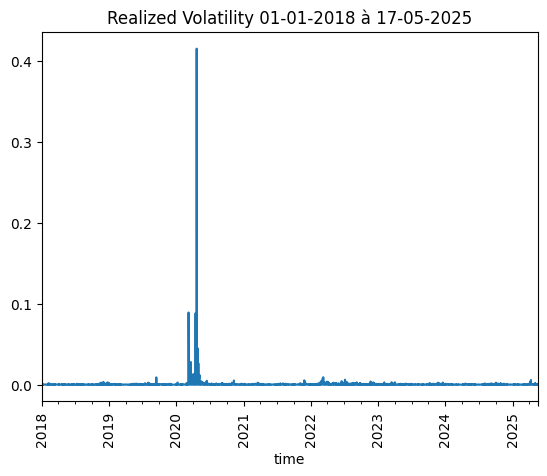

<Figure size 800x500 with 0 Axes>

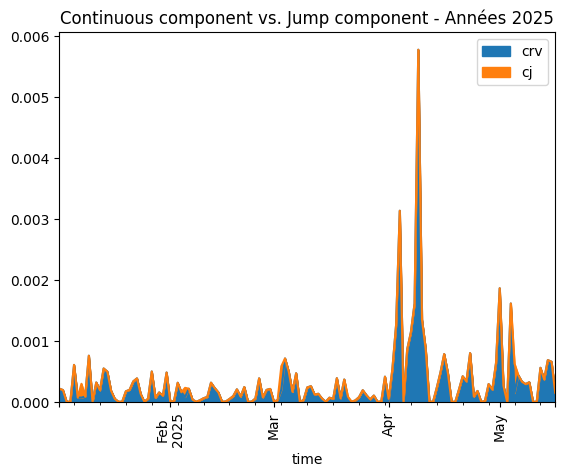

In [5]:
# rv
df_volatility['rv'].plot(title='Realized Volatility 01-01-2018 à 17-05-2025')
plt.xticks(rotation=90)
plt.show()

# crv x cj
plt.figure(figsize=(8, 5))
df_volatility_2025 = df_volatility[df_volatility.index > '2025-01-01']
df_volatility_2025[['crv', 'cj']].plot(kind='area', stacked=True)
plt.xticks(rotation=90)
plt.title('Continuous component vs. Jump component - Années 2025')
plt.show()

Sur le 1er graphique, on peut observer la période de forte volatilité lors de la pandémie de COVID-19. Sur le 2nd graphique qui ne représente que l'année 2025, on peut identifier une période de volatilité plus élevée qui a suivi le 2 avril 2025 ("Liberation day"), date de début de la hausse des tarifs douaniers américains.

## Décomposition de l'indice GPR

In [6]:
decomposer = GPRDecomposer()
df_gpr_augmente = decomposer.fit_transform(df_gpr['GPRD'])

c:\Users\lebre\OneDrive\Bureau\Econo_fi\projet_eco_fi\.venv_midas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lebre\OneDrive\Bureau\Econo_fi\projet_eco_fi\src\gpr_measures.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.v1 = self.results.params[0]
c:\Users\lebre\OneDrive\Bureau\Econo_fi\projet_eco_fi\src\gpr_measures.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.v2 = self.results.params[1]
c:\Users\lebre\OneDrive\Bureau\Econo_fi\projet_eco_fi\.venv_mida

- gpr (Geopolitical Risk index): Indice général mesurant les risques géopolitiques mondiaux
- GPRD_ACT (Geopolitical Risk - Actions): Mesure des risques géopolitiques basée sur les actions concrètes des acteurs politiques (press coverage of actual adverse geopolitical events, such as terrorist acts or the beginning of a war)
- GPRD_THREAT (Geopolitical Risk - Threats): Mesure des risques géopolitiques basée sur les menaces et déclarations d'intention.
- gpr_expected (Expected Geopolitical Risk): Mesure de risques géopolitiques qui ne sont pas imprévus (découle du lag d'un modèle AR(1))
- gpr_shocked (Shocked Geopolitical Risk): Mesure des chocs ou surprises de risques géopolitiques imprévus (découle du résidu d'un modèle AR(1))

In [7]:
# on veut garder GPRD_ACT et GPRD_THREAT pour la suite
df_gpr_augmente = pd.merge(df_gpr_augmente, df_gpr[['GPRD_ACT', 'GPRD_THREAT']], how='left', left_index=True, right_index=True)
df_gpr_augmente.head()

,gpr,gpr_expected,gpr_shocked,GPRD_ACT,GPRD_THREAT
DAY,,,,,
1985-01-02,115.676971,197.934759,-82.257788,146.772064,87.444572
1985-01-03,97.428459,112.229529,-14.801070,158.937653,29.459934
1985-01-04,157.366638,98.553774,58.812864,156.882248,157.026352
1985-01-05,81.361313,143.472496,-62.111183,92.698143,77.319405
1985-01-06,167.301392,86.512773,80.788619,166.786423,208.674530


## **Modèles MIDAS** : Estimations et prédictions

Construction du df joint

In [8]:
# df des volatilités du E-mini Crude Oil Futures
df_volatility.index = pd.to_datetime(df_volatility.index).normalize()
df_volatility.index = df_volatility.index.tz_localize(None)
print('len(df_volatility) :', len(df_volatility))

# df complet : mesures de volatilités + indices GPR
df = df_volatility.join(df_gpr_augmente, how='left')
df = df[:-1] # suppression  de la dernière ligne
print('len(df) :', len(df))
df.head()

len(df_volatility) : 2693
len(df) : 2692


,rv,rv_pos,rv_neg,bpv,tq,z_ratio,is_jump,crv,cj,gpr,gpr_expected,gpr_shocked,GPRD_ACT,GPRD_THREAT
time,,,,,,,,,,,,,,
2018-01-01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,False,0.000000,0.000000,96.576317,61.258551,35.317766,57.767429,112.428726
2018-01-02,0.000037,0.000003,3.383958e-05,0.000013,6.393689e-12,2.076162,True,0.000013,0.000025,188.690567,97.915163,90.775404,94.054878,278.937103
2018-01-03,0.000202,0.000202,6.524673e-07,0.000242,7.078387e-09,-0.625042,False,0.000202,0.000000,138.023651,166.947198,-28.923546,147.427292,172.156494
2018-01-04,0.000101,0.000058,4.335031e-05,0.000091,7.783019e-10,0.331907,False,0.000101,0.000000,146.357925,128.976522,17.381403,77.817291,194.721924
2018-01-05,0.000060,0.000012,4.768896e-05,0.000057,3.748316e-10,0.158287,False,0.000060,0.000000,66.517418,135.222374,-68.704956,88.416901,58.998741


Traitement des variables

In [9]:
df['gpr'] = df['gpr'] / 1000000
df['gpr_expected'] = df['gpr_expected'] / 1000000
df['gpr_shocked'] = df['gpr_shocked'] / 1000000

train test split

In [10]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
print('shape train_df :', train_df.shape)
print('shape test_df :', test_df.shape)

shape train_df : (2153, 14)
shape test_df : (539, 14)


Choix de l'indice GPR

In [11]:
gpr_str = 'gpr' # gpr ou gpr_expected ou gpr_shocked ou GPRD_THREAT ou GPRD_ACT

Choix des horizons à prédire

In [12]:
horizons = [1, 5, 22]

Choix de maxiter et kmax

In [13]:
kmax = 66
maxiter = 1000

Lancement du training et de la prédiction sur l'echantillon test

In [14]:
results = {}

# estimation par horizon
for h in horizons:
    print("\n", "-"*50, "prédiction à", h, "jours", "-"*50)
    
    # preparation des variables cibles pour chaque horizon (comme à la fin de la 2eme page de l'article)
    # en prenant la moyenne des h prochaines valeurs de RV pour l'horizon h
    # pour le train
    target = {}
    for i in range(len(train_df) - h):
        if i+h < len(train_df):
            # moyenne des h prochaines valeurs de RV pour l'horizon h
            target[i] = train_df['rv'].iloc[i+1:i+h+1].mean()
    
    y_train = np.array(list(target.values()))

    # pour le test
    target_test = {}
    for i in range(len(test_df) - h):
        if i+h < len(test_df):
            target_test[i] = test_df['rv'].iloc[i+1:i+h+1].mean()
    
    y_test = np.array(list(target_test.values()))
    
    # Ajustement du modèle MIDAS-RV (Modèle 0)
    print("Ajustement du modèle MIDAS-RV (Modèle 0)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    params_rv = midas.fit_midas_rv(y_train,
                                    train_df['rv'].values,
                                    horizon=h)
    print(f"Paramètres estimés: {params_rv}")
    
    pred_rv = midas.predict(test_df, model_type='MIDAS-RV')
    

    # Ajustement du modèle MIDAS-RS (Modèle 1)
    print("Ajustement du modèle MIDAS-RS (Modèle 1)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    
    params_rs = midas.fit_midas_rs(y_train,
                                    train_df['rv_pos'].values,
                                    train_df['rv_neg'].values,
                                    horizon=h)
    print(f"Paramètres estimés: {params_rs}")

    pred_rs = midas.predict(test_df, model_type='MIDAS-RS')
    
    # Ajustement du modèle MIDAS-CJ (Modèle 2)
    print("Ajustement du modèle MIDAS-CJ (Modèle 2)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    params_cj = midas.fit_midas_cj(y_train,
                                    train_df['crv'].values,
                                    train_df['cj'].values,
                                    horizon=h)
    print(f"Paramètres estimés: {params_cj}")
    
    pred_cj = midas.predict(test_df, model_type='MIDAS-CJ')

    # Ajustement du modèle MIDAS-RV-GPR (Modèle 3)
    print("Ajustement du modèle MIDAS-RV-GPR (Modèle 3)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    params_rv_gpr = midas.fit_midas_rv_gpr(y_train,
                                            train_df['rv'].values,
                                            train_df[gpr_str].values,
                                            horizon=h)
    print(f"Paramètres estimés: {params_rv_gpr}")
    
    pred_rv_gpr = midas.predict(test_df, model_type='MIDAS-RV-GPR', gpr_str=gpr_str)

    # Ajustement du modèle MIDAS-RS-GPR (Modèle 4)
    print("Ajustement du modèle MIDAS-RS-GPR (Modèle 4)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    params_rs_gpr = midas.fit_midas_rs_gpr(y_train, 
                                            train_df['rv_pos'].values,
                                            train_df['rv_neg'].values,
                                            train_df[gpr_str].values,
                                            horizon=h)
    print(f"Paramètres estimés: {params_rs_gpr}")
    
    pred_rs_gpr = midas.predict(test_df, model_type='MIDAS-RS-GPR', gpr_str=gpr_str)

    # Ajustement du modèle MIDAS-CJ-GPR (Modèle 5)
    print("Ajustement du modèle MIDAS-CJ-GPR (Modèle 5)")
    midas = MIDASModel(kmax=kmax, options_dict = {'maxiter': maxiter})
    params_cj_gpr = midas.fit_midas_cj_gpr(y_train,
                                            train_df['crv'].values,
                                            train_df['cj'].values,
                                            train_df[gpr_str].values,
                                            horizon=h)
    print(f"Paramètres estimés: {params_cj_gpr}")
    
    pred_cj_gpr = midas.predict(test_df, model_type='MIDAS-CJ-GPR', gpr_str=gpr_str)
    
    # predictions avec les différents modèles
    predictions = {
        'MIDAS-RV': pred_rv,
        'MIDAS-RS': pred_rs,
        'MIDAS-CJ': pred_cj,
        'MIDAS-RV-GPR': pred_rv_gpr,
        'MIDAS-RS-GPR': pred_rs_gpr,
        'MIDAS-CJ-GPR': pred_cj_gpr
    }

    # Evaluation des modèles sur l'ensemble de test

    # métriques d'erreur de l'article: HMSE et HMAE
    hmse = {}
    hmae = {}
    
    for name, pred in predictions.items():

        min_len = min(len(pred), len(y_test))
        pred_aligned = pred[:min_len - 2]
        y_test_aligned = y_test[:min_len - 2]
        
        ratio = np.divide(pred_aligned, y_test_aligned, out=np.zeros_like(pred_aligned), where=y_test_aligned!=0)
        
        # HMSE (équation 14 de l'article)
        hmse[name] = np.mean((1 - ratio) ** 2)
        # HMAE (équation 15 de l'article)
        hmae[name] = np.mean(np.abs(1 - ratio))
        
        print(f"{name}: HMSE = {hmse[name]:.4f}, HMAE = {hmae[name]:.4f}")
    
    # resultats
    results[h] = {
        'hmse': hmse,
        'hmae': hmae,
        'predictions': predictions,
        'actual': y_test
    }


 -------------------------------------------------- prédiction à 1 jours --------------------------------------------------
Ajustement du modèle MIDAS-RV (Modèle 0)
Paramètres estimés: {'beta0': np.float64(4.972834961194164e-09), 'beta1': np.float64(6.271067555610734e-07), 'theta_RV': (np.float64(1.1002638323579832), np.float64(1.0374581258001787))}
Ajustement du modèle MIDAS-RS (Modèle 1)
Paramètres estimés: {'beta0': np.float64(5.0352678833356395e-09), 'beta1': np.float64(5.644059126241931e-07), 'beta2': np.float64(6.597211434959219e-07), 'theta_RV_pos': (np.float64(1.7025382782855998), np.float64(1.4138844786837794)), 'theta_RV_neg': (np.float64(1.2954188939840345), np.float64(1.4200093411953298))}
Ajustement du modèle MIDAS-CJ (Modèle 2)
Paramètres estimés: {'beta0': np.float64(5.030899898748245e-09), 'beta1': np.float64(6.966835597787403e-07), 'beta2': np.float64(6.726382677685258e-08), 'theta_CRV': (np.float64(1.0949913750284856), np.float64(1.0208748194140935)), 'theta_CJ': (np

## **Modèles MIDAS** : Evaluation des résultats

In [15]:
evaluation = ModelEvaluation()

### Out-of-sample evaluations : métriques HMSE et HMAE

In [16]:
evaluation.create_loss_metrics_table(results, horizons)

,HMSE (h=1),HMAE (h=1),HMSE (h=5),HMAE (h=5),HMSE (h=22),HMAE (h=22)
MIDAS-RV,0.9985,0.9992,0.3807,0.5121,0.3184,0.4209
MIDAS-RS,0.9985,0.9992,0.3953,0.5181,0.3205,0.4222
MIDAS-CJ,0.9985,0.9992,0.3835,0.5118,0.3192,0.4201
MIDAS-RV-GPR,0.997,0.9985,0.4942,0.5238,0.3239,0.4231
MIDAS-RS-GPR,0.9983,0.9991,0.3978,0.5178,0.3258,0.4245
MIDAS-CJ-GPR,0.9986,0.9993,0.391,0.5113,0.5554,0.5172


### Out-of-sample evaluations : p-values des tests MCS

In [17]:
mcs_results = evaluation.run_all_mcs_tests(results, horizons = horizons, alpha = 0.25)
evaluation.create_mcs_metrics_table(mcs_results, horizons = horizons)

,HMSE (h=1),HMAE (h=1),HMSE (h=5),HMAE (h=5),HMSE (h=22),HMAE (h=22)
MIDAS-RV-GPR,1.0,1.0,0.116948,0.25,0.491406,0.496428
MIDAS-RS-GPR,0.832254,0.832756,0.318381,0.493598,0.325603,0.329783
MIDAS-CJ,0.665687,0.666144,0.827224,0.832539,0.831169,1.0
MIDAS-RS,0.499264,0.499608,0.480785,0.328876,0.662216,0.663264
MIDAS-RV,0.332837,0.333069,1.0,0.665586,1.0,0.831741
MIDAS-CJ-GPR,0.25,0.25,0.648587,1.0,0.042601,0.25
